##Creazione del grafo
Importo dati e funzioni utili per lavorare con le comunità

In [ ]:
import google.colab.drive
google.colab.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from matplotlib.colors import to_hex
from matplotlib import cm

# Carica i dati
df = pd.read_csv('/content/drive/MyDrive/social_network/got_new/dati/Workspace_7.csv')
df_edges = pd.read_csv('/content/drive/MyDrive/social_network/got_new/dati/asoiaf-all-edges.csv')


In [ ]:
# Create the graph
G = nx.Graph()

# Add nodes to the graph
for index, row in df.iterrows():
    node_id = row['Id'] # Assuming 'Id' is the column for node identifiers
    G.add_node(node_id, **row.drop('Id').to_dict()) # Add all columns except 'Id' as attributes

# Add edges to the graph
for index, row in df_edges.iterrows():
    G.add_edge(row['Source'], row['Target'])  # Adjust column names as needed

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.colors import to_hex

# Definizione delle casate e dei colori associati
houses = ['Arryn', 'Baratheon', 'Bolton', 'Cassel', 'Clegane', 'Frey', 'Greyjoy',
          'Jon-Snow', 'Lannister', 'Martell', 'Other', 'Selmy', 'Stark', 'Targaryen',
          'Tarly', 'Tully', 'Tyrell']
'''
colors = ['#3f95b6', '#e2c508', '#808080', '#2F4F4F', '#000000', '#000080', '#D4AF37',
'#FFFFFF', '#8e0d02', '#864b21', '#D3D3D3', '#52230c', '#3f3f3f', '#9B1B30',
          '#008000', '#04cefd', '#9cb794']
'''
colors = ['blue', 'gold', 'gray', 'dimgray', 'black', 'darkblue', 'goldenrod',
              'whitesmoke', 'firebrick', 'chocolate', 'lightgray', 'darkgreen', 'darkslategray', 'crimson',
              'forestgreen', 'deepskyblue', 'olivedrab']

def visualize_got_graph(G):
    # Verifica che ci siano abbastanza colori per le case
    if len(houses) > len(colors):
        raise ValueError("Non ci sono abbastanza colori per tutte le case definite.")

    # Assegna un colore unico a ciascuna casa
    house_colors = {house: color for house, color in zip(houses, colors)}

    # Crea lista dei colori dei nodi in base alla casa
    node_colors = []
    for node in G.nodes():
        house = G.nodes[node].get('house', 'Other')  # Casa di default "Other" per nodi senza casa
        node_colors.append(house_colors.get(house, '#D3D3D3'))  # Colore di default grigio chiaro

    # Crea lista dei colori degli archi
    edge_colors = []
    edge_alpha = []
    edge_width = []
    for u, v in G.edges():
        house_u = G.nodes[u].get('house', 'Other')
        house_v = G.nodes[v].get('house', 'Other')
        if house_u == house_v and house_u != 'Other':  # Se appartengono alla stessa casa, usa il colore della casa
            edge_colors.append(house_colors.get(house_u, '#D3D3D3'))
            edge_alpha.append(0.7)
            edge_width.append(0.8)
        else:  # Altrimenti usa un colore grigio
            edge_colors.append('#B0B0B0')
            edge_alpha.append(0.1)
            edge_width.append(0.3)

    # Calcola posizione dei nodi
    pos = nx.spring_layout(G, k=0.5, iterations=50)

    # Disegna il grafo
    plt.figure(figsize=(12, 8))
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_width, alpha=edge_alpha)  # Archi
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=20, alpha=0.7)  # Nodi

    # Aggiungi legenda
    legend_elements = [
        plt.Line2D([], [], marker='o', color='w', markerfacecolor=color, markersize=10, label=house)
        for house, color in house_colors.items()
    ]
    plt.legend(handles=legend_elements, loc='upper right', title="Case", fontsize='small')

    # Finalizza il grafico
    plt.title("Rete di Game of Thrones")
    plt.axis('off')
    plt.show()

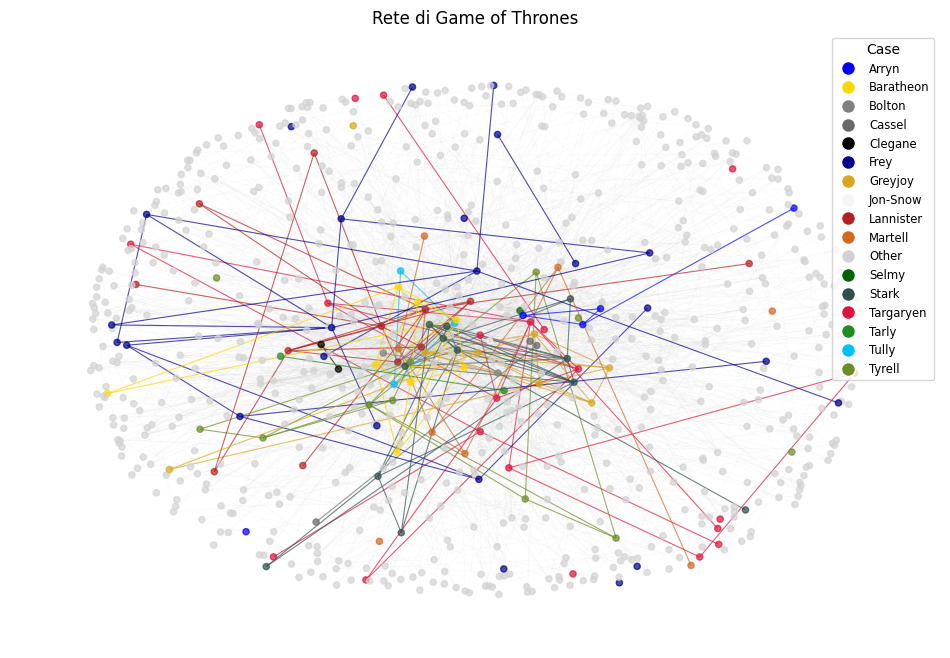

In [ ]:
visualize_got_graph(G)

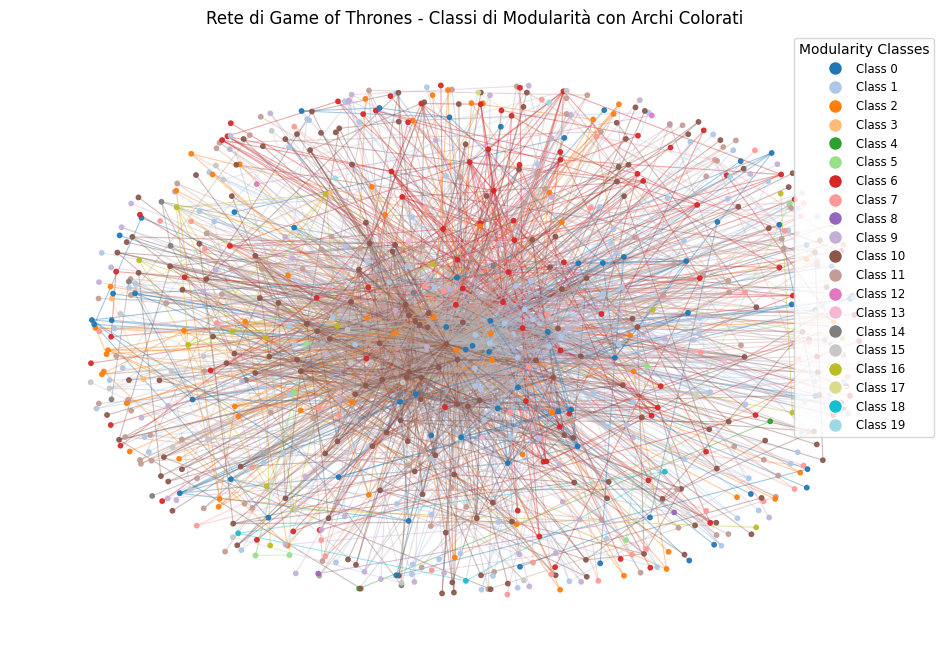

In [ ]:
def visualize_by_modularity(G):
    # Ottieni tutte le classi di modularità presenti nel grafo
    modularity_classes = set(nx.get_node_attributes(G, 'modularity_class').values())

    # Associa un colore a ciascuna classe di modularità
    cmap = plt.get_cmap('tab20')  # Mappa colori con 20 colori distinti
    color_map = {mod_class: cmap(i / len(modularity_classes)) for i, mod_class in enumerate(modularity_classes)}

    # Colori dei nodi basati sulla modularità
    node_colors = [
        color_map[G.nodes[node].get('modularity_class', -1)]  # Colore per la modularità del nodo
        for node in G.nodes()
    ]

    # Colori degli archi basati sulla modularità
    edge_colors = []
    for u, v in G.edges():
        mod_u = G.nodes[u].get('modularity_class', -1)
        mod_v = G.nodes[v].get('modularity_class', -1)
        if mod_u == mod_v and mod_u in color_map:  # Stessa modularità, usa il colore della comunità
            edge_colors.append(color_map[mod_u])
        else:  # Modularità diversa, usa un colore grigio
            edge_colors.append('#B0B0B0')

    # Calcola posizione dei nodi
    pos = nx.spring_layout(G, k=0.5, iterations=50)

    # Disegna il grafo
    plt.figure(figsize=(12, 8))
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=0.8, alpha=0.4)  # Archi
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=10, alpha=0.9)  # Nodi
    #nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')  # Etichette dei nodi

    # Aggiungi legenda
    legend_elements = [
        plt.Line2D([], [], marker='o', color='w', markerfacecolor=color_map[mod_class], markersize=10, label=f'Class {mod_class}')
        for mod_class in modularity_classes
    ]
    plt.legend(handles=legend_elements, loc='upper right', title="Modularity Classes", fontsize='small')

    # Finalizza il grafico
    plt.title("Rete di Game of Thrones - Classi di Modularità con Archi Colorati")
    plt.axis('off')
    plt.show()

visualize_by_modularity(G)

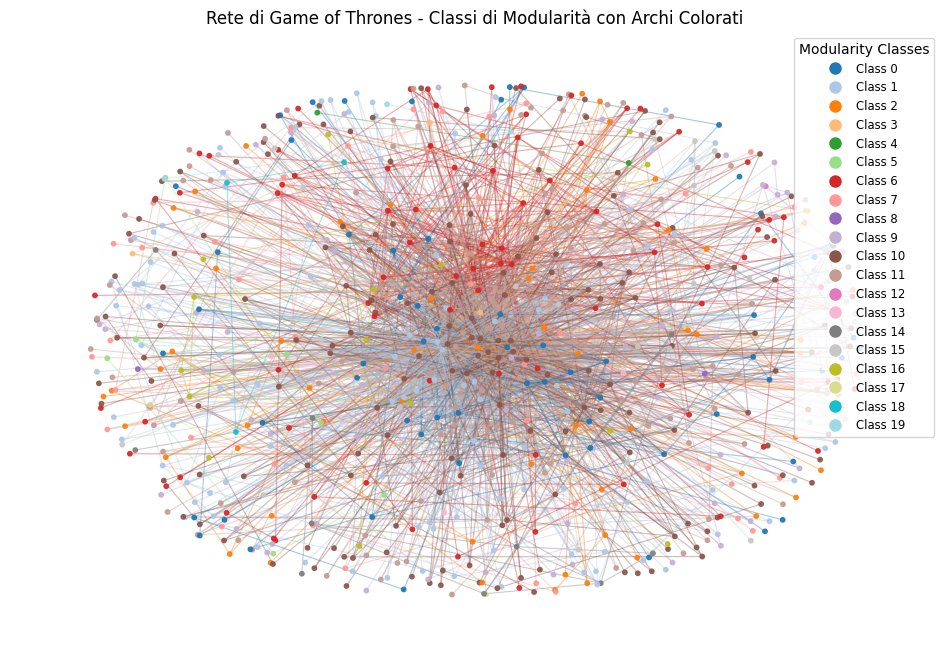

In [ ]:
def visualize_by_modularity(G):
    # Ottieni tutte le classi di modularità presenti nel grafo
    modularity_classes = set(nx.get_node_attributes(G, 'modularity_class').values())

    # Associa un colore a ciascuna classe di modularità
    cmap = plt.get_cmap('tab20')  # Mappa colori con 20 colori distinti
    color_map = {mod_class: cmap(i / len(modularity_classes)) for i, mod_class in enumerate(modularity_classes)}

    # Colori dei nodi basati sulla modularità
    node_colors = [
        color_map[G.nodes[node].get('modularity_class', -1)]  # Colore per la modularità del nodo
        for node in G.nodes()
    ]

    # Colori degli archi basati sulla modularità
    edge_colors = []
    for u, v in G.edges():
        mod_u = G.nodes[u].get('modularity_class', -1)
        mod_v = G.nodes[v].get('modularity_class', -1)
        if mod_u == mod_v and mod_u in color_map:  # Stessa modularità, usa il colore della comunità
            edge_colors.append(color_map[mod_u])
        else:  # Modularità diversa, usa un colore grigio
            edge_colors.append('#B0B0B0')

    # Calcola posizione dei nodi
    pos = nx.spring_layout(G, k=0.5, iterations=50)

    # Disegna il grafo
    plt.figure(figsize=(12, 8))
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=0.8, alpha=0.4)  # Archi
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=10, alpha=0.9)  # Nodi
    #nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')  # Etichette dei nodi

    # Aggiungi legenda
    legend_elements = [
        plt.Line2D([], [], marker='o', color='w', markerfacecolor=color_map[mod_class], markersize=10, label=f'Class {mod_class}')
        for mod_class in modularity_classes
    ]
    plt.legend(handles=legend_elements, loc='upper right', title="Modularity Classes", fontsize='small')

    # Finalizza il grafico
    plt.title("Rete di Game of Thrones - Classi di Modularità con Archi Colorati")
    plt.axis('off')
    plt.show()

visualize_by_modularity(G)

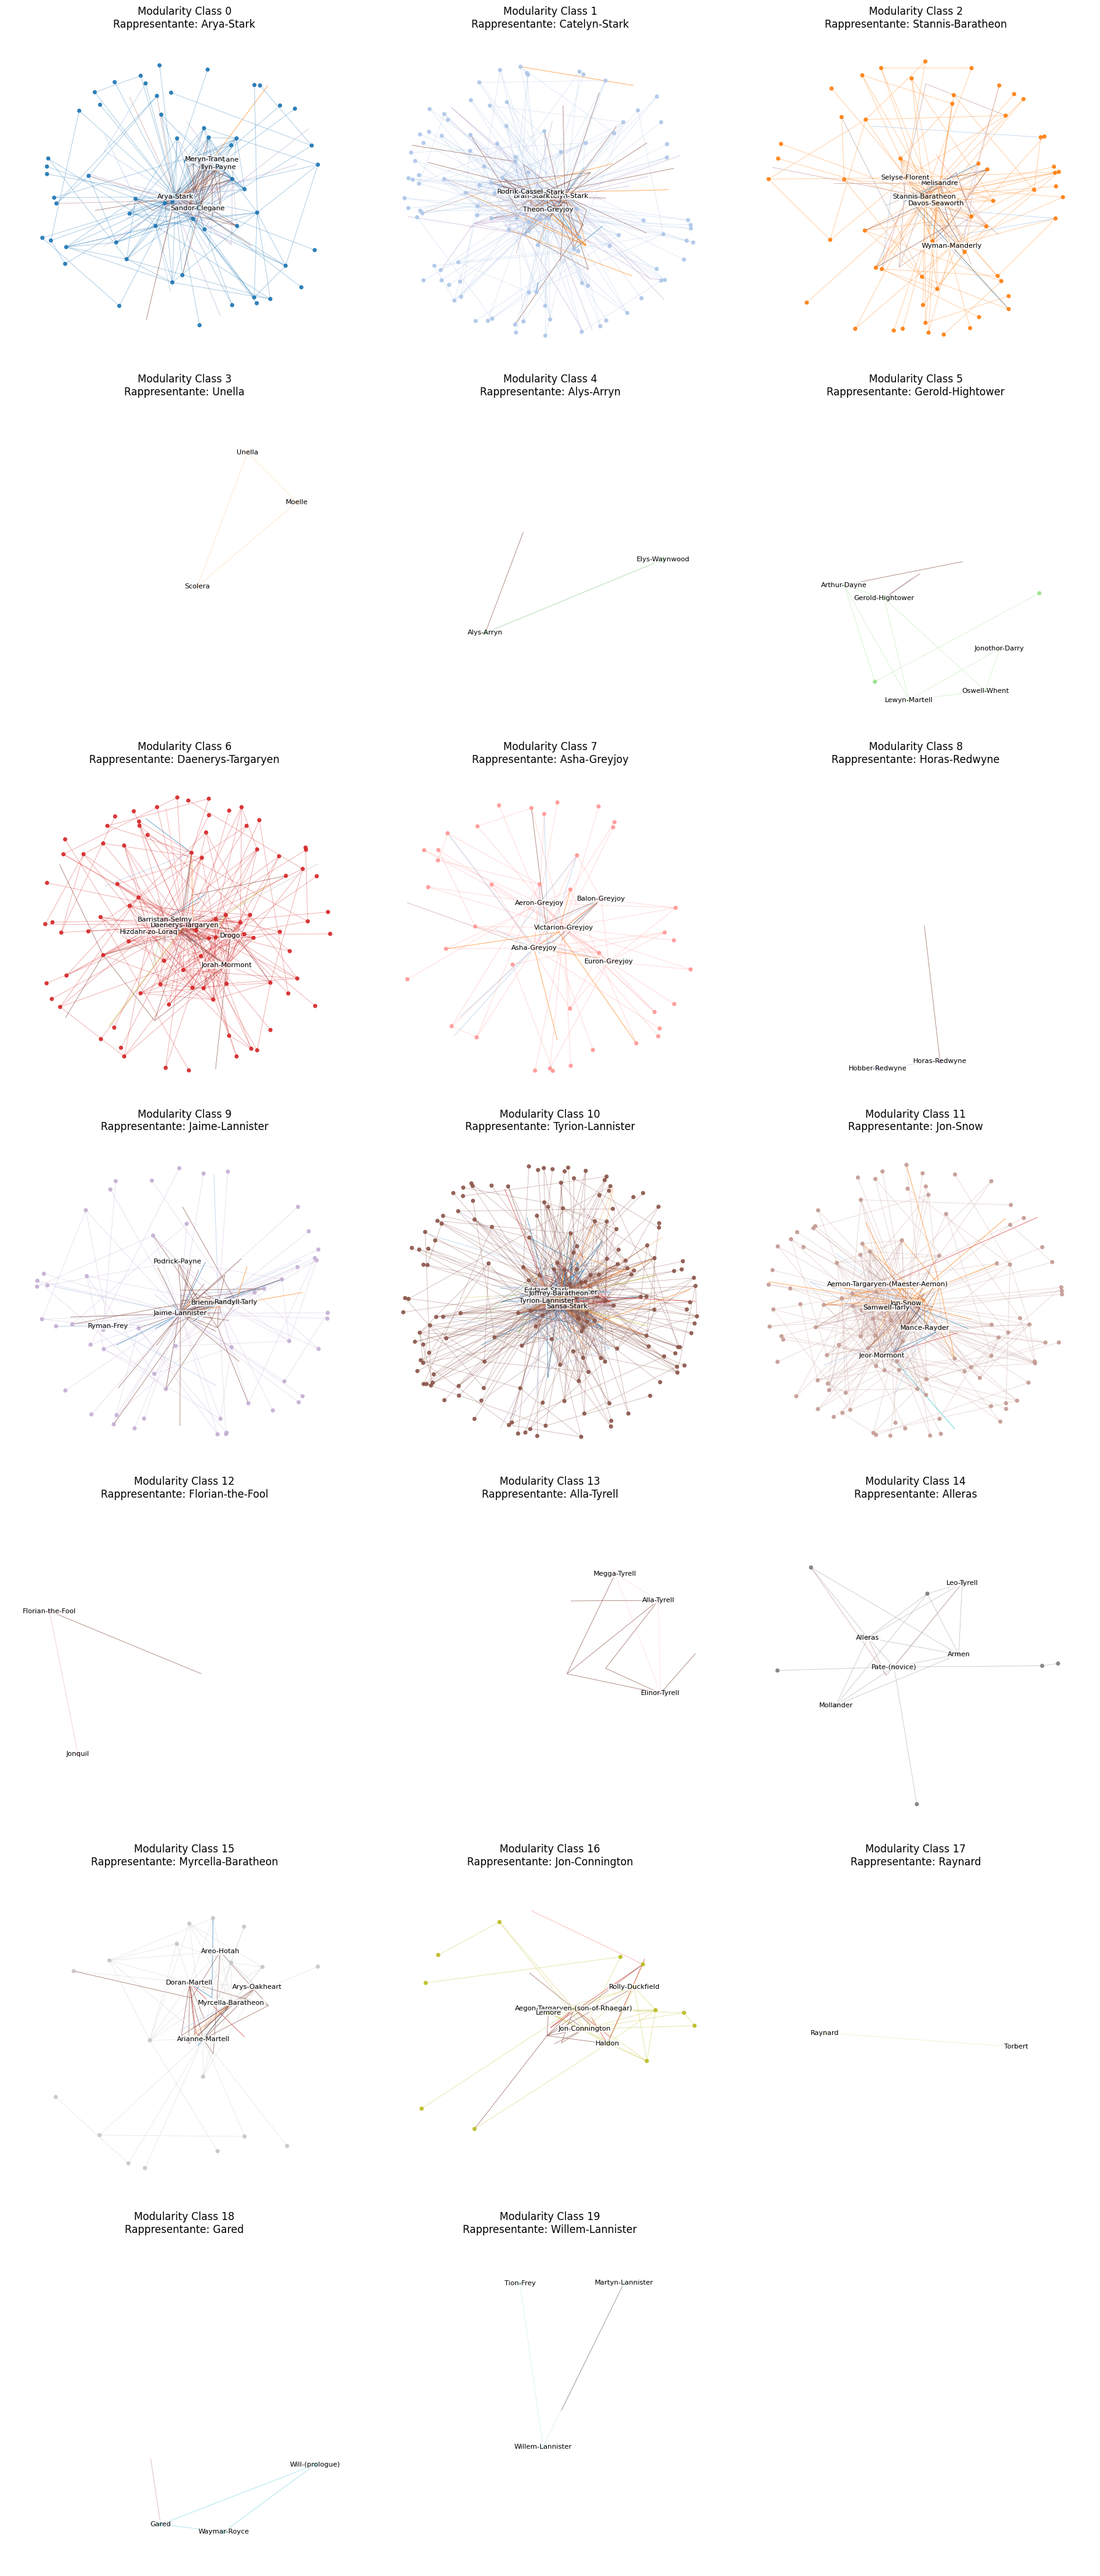

In [ ]:
def visualize_separate_modularity_classes(G, top_n=5):
    # Ottieni tutte le classi di modularità presenti nel grafo
    modularity_classes = sorted(set(nx.get_node_attributes(G, 'modularity_class').values()))

    # Associa un colore a ciascuna classe di modularità
    cmap = plt.get_cmap('tab20')  # Usa una mappa colori con 20 colori distinti
    color_map = {mod_class: cmap(i / len(modularity_classes)) for i, mod_class in enumerate(modularity_classes)}

    # Calcola posizione globale dei nodi
    pos = nx.spring_layout(G, k=0.5, iterations=50)

    # Configurazione griglia
    n_classes = len(modularity_classes)
    n_cols = 3
    n_rows = (n_classes + n_cols - 1) // n_cols  # Arrotonda per eccesso
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
    axes = axes.flatten()

    for idx, target_class in enumerate(modularity_classes):
        ax = axes[idx]

        # Trova i nodi più rappresentativi della classe (top_n per grado)
        nodes_in_class = [node for node in G.nodes if G.nodes[node].get('modularity_class') == target_class]
        top_nodes = sorted(nodes_in_class, key=lambda node: G.degree(node), reverse=True)[:top_n]
        representative_label = top_nodes[0] if top_nodes else "Nessun Nodo"


        # Colori e dimensioni dei nodi
        node_colors = []
        node_alpha = []
        for node in G.nodes():
            mod_class = G.nodes[node].get('modularity_class', -1)
            if mod_class == target_class:
                node_colors.append(color_map[target_class])  # Colore della classe selezionata
                node_alpha.append(0.9)  # Opacità massima
            else:
                node_colors.append((0, 0, 0, 0))  # Invisibile
                node_alpha.append(0.0)

        # Colori e alpha degli archi
        edge_colors = []
        edge_alpha = []
        for u, v in G.edges():
            mod_u = G.nodes[u].get('modularity_class', -1)
            mod_v = G.nodes[v].get('modularity_class', -1)
            if mod_u == target_class and mod_v == target_class:
                edge_colors.append(color_map[target_class])  # Archi interni alla stessa classe
                edge_alpha.append(0.5)
            elif mod_u == target_class:
                edge_colors.append(color_map[mod_v])  # Archi verso altre classi
                edge_alpha.append(0.9)
            else:
                edge_colors.append((0, 0, 0, 0))  # Invisibile
                edge_alpha.append(0.0)

        # Disegna il grafo
        nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=0.5, alpha=edge_alpha, ax=ax)  # Archi
        nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=15, alpha=node_alpha, ax=ax)  # Nodi

         # Aggiungi etichette dei nodi più rappresentativi
        for node in top_nodes:
            x, y = pos[node]
            ax.text(x, y, str(node), fontsize=8, ha='center', va='center',bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=0.5))

        # Aggiungi titolo con il rappresentante
        ax.set_title(f"Modularity Class {target_class}\nRappresentante: {representative_label}")
        ax.axis('off')

    # Rimuovi assi inutilizzati
    for idx in range(len(modularity_classes), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()

visualize_separate_modularity_classes(G)

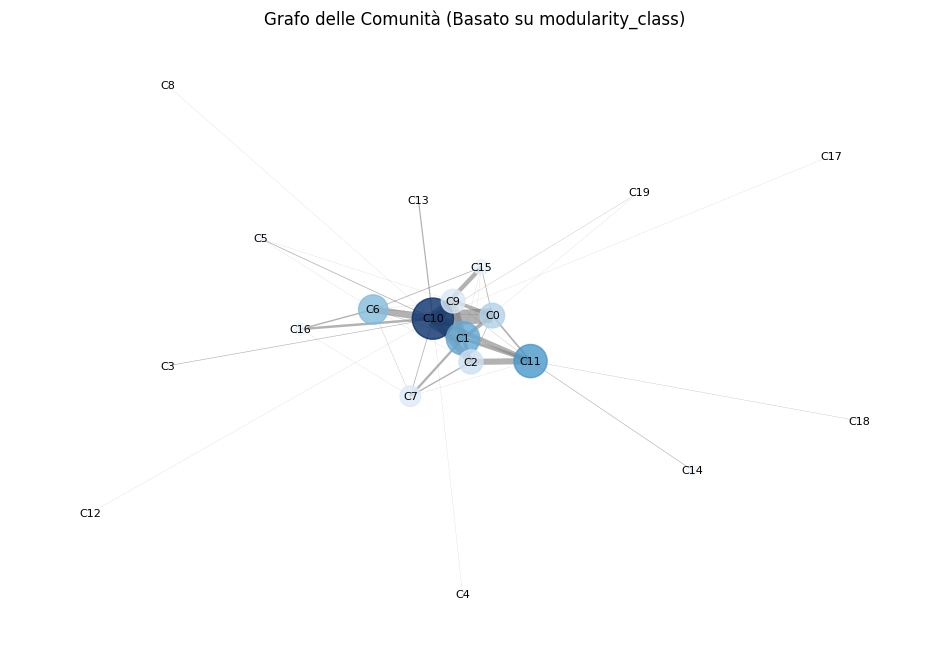

In [ ]:
import numpy as np

def create_community_graph_from_modularity(G):
    """
    Crea un grafo delle comunità basato sull'attributo 'modularity_class'.

    Args:
        G (nx.Graph): Il grafo originale.

    Returns:
        nx.Graph: Il grafo delle comunità.
    """
    # Creiamo un nuovo grafo per le comunità
    community_graph = nx.Graph()

    # Raggruppa i nodi per modularity_class
    communities = {}
    for node, data in G.nodes(data=True):
        community = data.get('modularity_class')
        if community not in communities:
            communities[community] = []
        communities[community].append(node)

    # Aggiungi nodi per ogni comunità
    for community, members in communities.items():
        internal_edges_weight = G.subgraph(members).size(weight='weight')  # Somma dei pesi interni
        community_graph.add_node(
            community,
            num_members=len(members),
            total_internal_weight=internal_edges_weight
        )

    # Aggiungi archi tra comunità
    for community_i, members_i in communities.items():
        for community_j, members_j in communities.items():
            if community_i < community_j:  # Considera ogni coppia una sola volta
                # Somma dei pesi degli archi tra i membri delle due comunità
                edge_weight = sum(
                    G[u][v].get('weight', 1)  # Usa peso se presente, altrimenti 1
                    for u in members_i
                    for v in members_j
                    if G.has_edge(u, v)
                )
                if edge_weight > 0:
                    community_graph.add_edge(community_i, community_j, weight=edge_weight)

    return community_graph

def plot_community_graph(community_graph):
    """
    Visualizza il grafo delle comunità.

    Args:
        community_graph (nx.Graph): Il grafo delle comunità.
    """
    pos = nx.spring_layout(community_graph, seed=42)
    node_sizes = [d['num_members'] * 5 for _, d in community_graph.nodes(data=True)]  # Dimensioni proporzionali al numero di membri
    edge_weights = [d['weight'] for _, _, d in community_graph.edges(data=True)]  # Peso degli archi

    # Get total internal weights for color scaling
    # Get total internal weights for color scaling
    total_internal_weights = [d['total_internal_weight'] for _, d in community_graph.nodes(data=True)]
    # Convert the list to a NumPy array for element-wise operations
    total_internal_weights = np.array(total_internal_weights)
    normalized_weights = (total_internal_weights - np.min(total_internal_weights)) / (np.max(total_internal_weights) - np.min(total_internal_weights))
    # Apply colormap to normalized weights
    cmap = plt.get_cmap('Blues')
    node_colors = [cmap(weight) for weight in normalized_weights]

    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(community_graph, pos, node_size=node_sizes, node_color=node_colors, alpha=0.8)
    nx.draw_networkx_edges(community_graph, pos, width=[w / 9 for w in edge_weights], alpha=0.6, edge_color='gray')
    nx.draw_networkx_labels(community_graph, pos, labels={n: f"C{n}" for n in community_graph.nodes()}, font_size=8)
    plt.title("Grafo delle Comunità (Basato su modularity_class)")
    plt.axis('off')
    plt.show()

# Esempio di utilizzo
community_graph = create_community_graph_from_modularity(G)
plot_community_graph(community_graph)


## Export data

In [ ]:
import pandas as pd

def create_community_graph_from_modularity(G, output_path):
    """
    Crea un grafo delle comunità basato sull'attributo 'modularity_class'
    e lo esporta in formato CSV per Gephi utilizzando Pandas.

    Args:
        G (nx.Graph): Il grafo originale.
        output_path (str): Directory di output per salvare i file CSV.

    Returns:
        nx.Graph: Il grafo delle comunità.
    """
    # Creiamo un nuovo grafo per le comunità
    community_graph = nx.Graph()

    # Raggruppa i nodi per modularity_class
    communities = {}
    for node, data in G.nodes(data=True):
        community = data.get('modularity_class')
        if community is not None:  # Ignora i nodi senza modularity_class
            if community not in communities:
                communities[community] = []
            communities[community].append(node)


    # Aggiungi nodi per ogni comunità
    nodes_data = []
    for community, members in communities.items():
        internal_edges_weight = G.subgraph(members).size(weight='weight')  # Somma dei pesi interni
        community_graph.add_node(
            community,
            num_members=len(members),
            total_internal_weight=internal_edges_weight
        )
        nodes_data.append({
            'Id': community,
            'NumMembers': len(members),
            'TotalInternalWeight': internal_edges_weight
        })

    # Aggiungi archi tra comunità
    edges_data = []
    for community_i, members_i in communities.items():
        for community_j, members_j in communities.items():
            if community_i < community_j:  # Considera ogni coppia una sola volta
                edge_weight = sum(
                    G[u][v].get('weight', 1)  # Usa peso se presente, altrimenti 1
                    for u in members_i
                    for v in members_j
                    if G.has_edge(u, v)
                )
                if edge_weight > 0:
                    community_graph.add_edge(community_i, community_j, weight=edge_weight)
                    edges_data.append({
                        'Source': community_i,
                        'Target': community_j,
                        'Weight': edge_weight
                    })

    # Esporta nodi in formato CSV
    nodes_df = pd.DataFrame(nodes_data)
    nodes_csv_path = f"{output_path}/nodi.csv"
    nodes_df.to_csv(nodes_csv_path, index=False, encoding='utf-8')

    # Esporta archi in formato CSV
    edges_df = pd.DataFrame(edges_data)
    edges_csv_path = f"{output_path}/archi.csv"
    edges_df.to_csv(edges_csv_path, index=False, encoding='utf-8')

    return community_graph

community_graph = create_community_graph_from_modularity(G, '/content/drive/MyDrive/social_network/got_new/dati')

test_nodes = pd.read_csv('/content/drive/MyDrive/social_network/got_new/dati/nodi.csv')
print(test_nodes)
archi = pd.read_csv('/content/drive/MyDrive/social_network/got_new/dati/archi.csv')
print(archi)

    Id  NumMembers  TotalInternalWeight
0   10         176                577.0
1    1         115                302.0
2    6          89                253.0
3   16          16                 32.0
4   11         114                349.0
5    9          58                 88.0
6    2          60                122.0
7    7          44                 76.0
8   13           3                  3.0
9   14          11                 19.0
10   4           2                  1.0
11   0          63                181.0
12  15          23                 52.0
13   5           7                  9.0
14  12           2                  1.0
15  18           3                  3.0
16   8           2                  1.0
17  19           3                  2.0
18   3           3                  3.0
19  17           2                  1.0
    Source  Target  Weight
0       10      16      16
1       10      11      30
2       10      13       8
3       10      15      28
4       10      12       

In [ ]:
def create_houses_graph_from_modularity(G, output_path):
    """
    Crea un grafo delle comunità basato sull'attributo 'modularity_class'
    e lo esporta in formato CSV per Gephi utilizzando Pandas.

    Args:
        G (nx.Graph): Il grafo originale.
        output_path (str): Directory di output per salvare i file CSV.

    Returns:
        nx.Graph: Il grafo delle comunità.
    """
    # Creiamo un nuovo grafo per le comunità
    houses_graph = nx.Graph()

    # Raggruppa i nodi per modularity_class
    houses = {}
    for node, data in G.nodes(data=True):
        house = data.get('house')
        if house is not None:  # Ignora i nodi senza modularity_class
            if house not in houses:
                houses[house] = []
            houses[house].append(node)


    # Aggiungi nodi per ogni comunità
    nodes_data = []
    for house, members in houses.items():
        internal_edges_weight = G.subgraph(members).size(weight='weight')  # Somma dei pesi interni
        houses_graph.add_node(
            house,
            num_members=len(members),
            total_internal_weight=internal_edges_weight
        )
        nodes_data.append({
            'Id': house,
            'NumMembers': len(members),
            'TotalInternalWeight': internal_edges_weight
        })

    # Aggiungi archi tra comunità
    edges_data = []
    for house_i, members_i in houses.items():
        for house_j, members_j in houses.items():
            if house_i < house_j:  # Considera ogni coppia una sola volta
                edge_weight = sum(
                    G[u][v].get('weight', 1)  # Usa peso se presente, altrimenti 1
                    for u in members_i
                    for v in members_j
                    if G.has_edge(u, v)
                )
                if edge_weight > 0:
                    houses_graph.add_edge(house_i, house_j, weight=edge_weight)
                    edges_data.append({
                        'Source': house_i,
                        'Target': house_j,
                        'Weight': edge_weight
                    })

    # Esporta nodi in formato CSV
    nodes_df = pd.DataFrame(nodes_data)
    nodes_csv_path = f"{output_path}/nodi-houses.csv"
    nodes_df.to_csv(nodes_csv_path, index=False, encoding='utf-8')

    # Esporta archi in formato CSV
    edges_df = pd.DataFrame(edges_data)
    edges_csv_path = f"{output_path}/archi-houses.csv"
    edges_df.to_csv(edges_csv_path, index=False, encoding='utf-8')

    return houses_graph

house_graph = create_houses_graph_from_modularity(G, '/content/drive/MyDrive/social_network/got_new/dati')

test_nodes = pd.read_csv('/content/drive/MyDrive/social_network/got_new/dati/nodi-houses.csv')
print(test_nodes)
archi = pd.read_csv('/content/drive/MyDrive/social_network/got_new/dati/archi-houses.csv')
print(archi)

           Id  NumMembers  TotalInternalWeight
0       Other         673                991.0
1        Frey          24                 21.0
2   Targaryen          21                 21.0
3     Greyjoy           8                 17.0
4      Tyrell          11                 14.0
5       Arryn           5                  4.0
6     Martell           8                  7.0
7       Stark          12                 33.0
8       Selmy           1                  0.0
9      Cassel           3                  2.0
10      Tully           3                  3.0
11  Lannister          12                 22.0
12    Clegane           2                  1.0
13  Baratheon           8                 18.0
14   Jon-Snow           1                  0.0
15     Bolton           2                  1.0
16      Tarly           2                  1.0
    Source     Target  Weight
0    Other  Targaryen     104
1    Other     Tyrell      41
2    Other      Stark     244
3    Other      Selmy      27
4   

###Calcolo statistiche di base per comunità

In [ ]:
house_colors = {house: color for house, color in zip(houses, colors)}
house_colors

{'Arryn': 'blue',
 'Baratheon': 'gold',
 'Bolton': 'gray',
 'Cassel': 'dimgray',
 'Clegane': 'black',
 'Frey': 'darkblue',
 'Greyjoy': 'goldenrod',
 'Jon-Snow': 'whitesmoke',
 'Lannister': 'firebrick',
 'Martell': 'chocolate',
 'Other': 'lightgray',
 'Selmy': 'darkgreen',
 'Stark': 'darkslategray',
 'Targaryen': 'crimson',
 'Tarly': 'forestgreen',
 'Tully': 'deepskyblue',
 'Tyrell': 'olivedrab'}

In [ ]:
import networkx as nx
import numpy as np

# Filtriamo i dati per modularity_class
modularity = np.unique(df['modularity_class'])


# Funzione per calcolare le misure di centralità
def calculate_centrality_measures(group_df, group_edges):

  # Creiamo un grafo (graph) basato sulle informazioni contenute nel DataFrame
    G = nx.Graph()

    # Aggiungi i nodi
    for idx, row in group_df.iterrows():
        G.add_node(row['Id'], label=row['Label'], house=row['house'])

    # Aggiungi gli archi se le informazioni sono disponibili (ad esempio, grado o relazioni)
    # Aggiungi gli archi dal file degli archi (df_edges)
    for idx, row in group_edges.iterrows():
        source = row['Source']
        target = row['Target']
        G.add_edge(source, target)


    #print(f"Numero di nodi: {G.number_of_nodes()}")
    #print(f"Numero di archi: {G.number_of_edges()}")
    #plot_graph(G)

    # Misure di centralità
    centrality_measures = {}

    # Degree Centrality
    centrality_measures['degree_centrality'] = nx.degree_centrality(G)

    # Betweenness Centrality
    centrality_measures['betweenness_centrality'] = nx.betweenness_centrality(G)

    # Closeness Centrality
    centrality_measures['closeness_centrality'] = nx.closeness_centrality(G)

    # PageRank
    centrality_measures['pagerank'] = nx.pagerank(G)

    # Coefficiente di clustering (clustering coefficient)
    centrality_measures['clustering_coefficient'] = nx.clustering(G)

    # Calcolo Eigen Vector
    centrality_measures['eigenvector_centrality'] = nx.eigenvector_centrality(G, max_iter=1000, tol=1e-06)

    # Calcolo della densità all'interno della comunità
    num_internal_edges = G.number_of_edges()
    num_possible_edges = len(group_df) * (len(group_df) - 1) / 2
    centrality_measures['intra_density'] = num_internal_edges / num_possible_edges if num_possible_edges > 0 else 0


    return centrality_measures

Calcolo delle misure rispetto alle modularità

In [ ]:
# Calcola le misure per ciascun valore di 'modularity_class'
results = {}

for modularity_class in modularity:
    # Filtra il DataFrame per ciascun 'modularity_class'
    group_df = df[df['modularity_class'] == modularity_class]
    group_edges = df_edges[df_edges['Source'].isin(group_df['Id']) & df_edges['Target'].isin(group_df['Id'])]

    print("Modularity ", modularity_class)
    # Calcola le misure di centralità per il gruppo filtrato
    centrality_measures = calculate_centrality_measures(group_df, group_edges)

    # Salva i risultati per ogni classe
    results[modularity_class] = centrality_measures

Modularity  0
Modularity  1
Modularity  2
Modularity  3
Modularity  4
Modularity  5
Modularity  6
Modularity  7
Modularity  8
Modularity  9
Modularity  10
Modularity  11
Modularity  12
Modularity  13
Modularity  14
Modularity  15
Modularity  16
Modularity  17
Modularity  18
Modularity  19


In [ ]:
# Print ignorante
# Mostra i risultati
for modularity_class, measures in results.items():
    print(f"Modularity Class: {modularity_class}")
    for measure, values in measures.items():
        print(f"  {measure}: {values}")
    print()

Modularity Class: 0
  degree_centrality: {'Amabel': 0.03225806451612903, 'Amory-Lorch': 0.2096774193548387, 'Anguy': 0.14516129032258063, 'Aron-Santagar': 0.016129032258064516, 'Arya-Stark': 0.8064516129032258, 'Bellegere-Otherys': 0.016129032258064516, 'Beric-Dondarrion': 0.16129032258064516, 'Biter': 0.06451612903225806, 'Brea': 0.04838709677419355, 'Brusco': 0.03225806451612903, 'Chiswyck': 0.1774193548387097, 'Cutjack': 0.04838709677419355, 'Denyo-Terys': 0.03225806451612903, 'Dobber': 0.016129032258064516, 'Dunsen': 0.1774193548387097, 'Garth-Greyfeather': 0.03225806451612903, 'Gendry': 0.25806451612903225, 'Greenbeard': 0.11290322580645161, 'Gregor-Clegane': 0.1935483870967742, 'Hairy-Hal': 0.03225806451612903, 'Harra': 0.03225806451612903, 'Harren-Hoare': 0.016129032258064516, 'Harwin': 0.11290322580645161, 'Hot-Pie': 0.1774193548387097, 'Husband': 0.03225806451612903, 'Ilyn-Payne': 0.16129032258064516, 'Jack-Be-Lucky': 0.016129032258064516, 'Jack-Bulwer': 0.06451612903225806, '

Calcolo delle misure rispetto alle casate

In [ ]:
# Calcola le misure per ciascun valore di 'modularity_class'
resultsHouses = {}
houses = np.unique(df['house'])
houses = houses[houses != 'Other']

for house in houses:
    # Filtra il DataFrame per ciascun 'modularity_class'
    group_df = df[df['house'] == house]
    group_edges = df_edges[df_edges['Source'].isin(group_df['Id']) & df_edges['Target'].isin(group_df['Id'])]

    print("House", house)
    # Calcola le misure di centralità per il gruppo filtrato
    centrality_measures = calculate_centrality_measures(group_df, group_edges)

    # Salva i risultati per ogni classe
    resultsHouses[house] = centrality_measures

House Arryn
House Baratheon
House Bolton
House Cassel
House Clegane
House Frey
House Greyjoy
House Jon-Snow
House Lannister
House Martell
House Selmy
House Stark
House Targaryen
House Tarly
House Tully
House Tyrell


In [ ]:
# Print ignorante
# Mostra i risultati
for house, measures in resultsHouses.items():
    print(f"House: {house}")
    for measure, values in measures.items():
        print(f"  {measure}: {values}")
    print()

House: Arryn
  degree_centrality: {'Alys-Arryn': 0.25, 'Elbert-Arryn': 0.0, 'Jon-Arryn': 0.75, 'Lysa-Arryn': 0.5, 'Robert-Arryn': 0.5}
  betweenness_centrality: {'Alys-Arryn': 0.0, 'Elbert-Arryn': 0.0, 'Jon-Arryn': 0.3333333333333333, 'Lysa-Arryn': 0.0, 'Robert-Arryn': 0.0}
  closeness_centrality: {'Alys-Arryn': 0.44999999999999996, 'Elbert-Arryn': 0.0, 'Jon-Arryn': 0.75, 'Lysa-Arryn': 0.5625, 'Robert-Arryn': 0.5625}
  pagerank: {'Alys-Arryn': 0.13629777039596325, 'Elbert-Arryn': 0.03614457831325302, 'Jon-Arryn': 0.35347942441816593, 'Lysa-Arryn': 0.23703911343630887, 'Robert-Arryn': 0.23703911343630887}
  clustering_coefficient: {'Alys-Arryn': 0, 'Elbert-Arryn': 0, 'Jon-Arryn': 0.3333333333333333, 'Lysa-Arryn': 1.0, 'Robert-Arryn': 1.0}
  eigenvector_centrality: {'Alys-Arryn': 0.28184664735759357, 'Elbert-Arryn': 1.579489577304808e-07, 'Jon-Arryn': 0.6116289079988952, 'Lysa-Arryn': 0.5227200714882385, 'Robert-Arryn': 0.5227200714882385}
  intra_density: 0.4

House: Baratheon
  degree_

# **ANALISI DELLE COMUNITA'**

##**Identificazione delle principali fazioni e alleanze**
####**Identificazione delle comunità principali**
L'obiettivo è determinare i gruppi principali o le fazioni presenti nella rete sociale di Game of Thrones. Questo è essenziale per comprendere come i personaggi si organizzano in sottoreti e per analizzare le dinamiche sociali tra gruppi come casate, alleanze e fazioni politiche.


Metriche usate:
* **Louvain Modularity**: Algoritmo utilizzato per rilevare le comunità massimizzando la modularità, che misura la densità delle connessioni all'interno delle comunità rispetto a quelle tra comunità diverse. Questo aiuta a identificare cluster di personaggi che interagiscono principalmente tra loro.
* **Inter- e intra-community density**: Misura il rapporto tra le connessioni all'interno di una comunità e quelle tra comunità diverse, utile per verificare la coesione di ogni gruppo.



###Sviluppo
Identificazione e calcolo misure di centralità delle comunità.

In [ ]:
# Calcola le misure per ciascun valore di 'modularity_class'
resultsComunities = {}

for modularity_class in modularity:
    # Filtra il DataFrame per ciascun 'modularity_class'
    group_df = df[df['modularity_class'] == modularity_class]

    rappresentante = group_df.loc[group_df['Authority'].idxmax()]

    group_edges = df_edges[df_edges['Source'].isin(group_df['Id']) & df_edges['Target'].isin(group_df['Id'])]

    print("Modularity", modularity_class, "- rappresentante:", rappresentante['Label'])
    # Calcola le misure di centralità per il gruppo filtrato
    centrality_measures = calculate_centrality_measures(group_df, group_edges)

    # Salva i risultati per ogni classe
    resultsComunities[modularity_class] = centrality_measures
    resultsComunities[modularity_class]['Authority'] = rappresentante['Label']

Modularity 0 - rappresentante: Arya Stark
Modularity 1 - rappresentante: Catelyn Stark
Modularity 2 - rappresentante: Stannis Baratheon
Modularity 3 - rappresentante: Unella
Modularity 4 - rappresentante: Alys Arryn
Modularity 5 - rappresentante: Gerold Hightower
Modularity 6 - rappresentante: Barristan Selmy
Modularity 7 - rappresentante: Balon Greyjoy
Modularity 8 - rappresentante: Horas Redwyne
Modularity 9 - rappresentante: Jaime Lannister
Modularity 10 - rappresentante: Tyrion Lannister
Modularity 11 - rappresentante: Jon Snow
Modularity 12 - rappresentante: Florian the Fool
Modularity 13 - rappresentante: Alla Tyrell
Modularity 14 - rappresentante: Alleras
Modularity 15 - rappresentante: Myrcella Baratheon
Modularity 16 - rappresentante: Jon Connington
Modularity 17 - rappresentante: Raynard
Modularity 18 - rappresentante: Waymar Royce
Modularity 19 - rappresentante: Willem Lannister


Calcolo della densità intra e inter comunitaria delle densità

In [ ]:
from collections import defaultdict

# Creiamo un grafo (graph) basato sulle informazioni contenute nel DataFrame
G = nx.Graph()

# Aggiungi i nodi
for idx, row in df.iterrows():
    G.add_node(row['Id'], label=row['Label'], house=row['house'], modularity=row['modularity_class'])

# Aggiungi gli archi se le informazioni sono disponibili (ad esempio, grado o relazioni)
# Aggiungi gli archi dal file degli archi (df_edges)
for idx, row in df_edges.iterrows():
    source = row['Source']
    target = row['Target']
    G.add_edge(source, target)

# Analizza connessioni inter-comunitarie
inter_connections = defaultdict(int)

for u, v in G.edges():
    comm_u = G.nodes[u]['modularity']
    comm_v = G.nodes[v]['modularity']
    if comm_u != comm_v:
        inter_connections[(comm_u, comm_v)] += 1


# Stampa i risultati
print("Densità intra-comunitaria:")
for modularity_class, measures in resultsComunities.items():
    print(f"Comunità {modularity_class} {measures['Authority']}: {measures['intra_density']:.2f}")


print("\nConnessioni inter-comunitarie:")
for (comm_u, comm_v), count in inter_connections.items():
   print(f"Tra Comunità {comm_u} e {comm_v}: {count} collegamenti")

Densità intra-comunitaria:
Comunità 0 Arya Stark: 0.09
Comunità 1 Catelyn Stark: 0.05
Comunità 2 Stannis Baratheon: 0.07
Comunità 3 Unella: 1.00
Comunità 4 Alys Arryn: 1.00
Comunità 5 Gerold Hightower: 0.43
Comunità 6 Barristan Selmy: 0.06
Comunità 7 Balon Greyjoy: 0.08
Comunità 8 Horas Redwyne: 1.00
Comunità 9 Jaime Lannister: 0.05
Comunità 10 Tyrion Lannister: 0.04
Comunità 11 Jon Snow: 0.05
Comunità 12 Florian the Fool: 1.00
Comunità 13 Alla Tyrell: 1.00
Comunità 14 Alleras: 0.35
Comunità 15 Myrcella Baratheon: 0.21
Comunità 16 Jon Connington: 0.27
Comunità 17 Raynard: 1.00
Comunità 18 Waymar Royce: 1.00
Comunità 19 Willem Lannister: 0.67

Connessioni inter-comunitarie:
Tra Comunità 10 e 1: 38 collegamenti
Tra Comunità 10 e 9: 21 collegamenti
Tra Comunità 6 e 10: 36 collegamenti
Tra Comunità 6 e 0: 3 collegamenti
Tra Comunità 6 e 1: 1 collegamenti
Tra Comunità 6 e 2: 1 collegamenti
Tra Comunità 16 e 6: 5 collegamenti
Tra Comunità 16 e 10: 14 collegamenti
Tra Comunità 11 e 14: 1 coll

Winner and losers nelle comunità

In [ ]:
# Trova le 5 casate con maggiore densità intra-comunitaria
top_5_density_comm = sorted(resultsComunities.items(), key=lambda x: x[1]['intra_density'], reverse=True)[:5]
##fai pesato rispetto al numero di nodi


# Trova le 5 coppie con il maggior numero di connessioni inter-comunitarie
top_5_connected_comm = sorted(inter_connections.items(), key=lambda x: x[1], reverse=True)[:5]

# Stampa i risultati
print("Top 5 casate con maggiore densità intra-comunitaria:")
for comm, measures in top_5_density_comm:
    print(f"Comunità {comm} {measures['Authority']}: {measures['intra_density']:.2f}")

print("\nTop 5 coppie di casate con il numero massimo di connessioni inter-comunitarie:")
for (comm_u, comm_v), count in top_5_connected_comm:
    print(f"Tra Comunità {comm_u} e {comm_v}: {count} collegamenti")


Top 5 casate con maggiore densità intra-comunitaria:
Comunità 3 Unella: 1.00
Comunità 4 Alys Arryn: 1.00
Comunità 8 Horas Redwyne: 1.00
Comunità 12 Florian the Fool: 1.00
Comunità 13 Alla Tyrell: 1.00

Top 5 coppie di casate con il numero massimo di connessioni inter-comunitarie:
Tra Comunità 1 e 10: 68 collegamenti
Tra Comunità 9 e 10: 55 collegamenti
Tra Comunità 0 e 10: 54 collegamenti
Tra Comunità 10 e 0: 42 collegamenti
Tra Comunità 10 e 1: 38 collegamenti


Identificazione delle casate e calcolo delle metriche rispetto alle casate

In [ ]:
# Calcola le misure per ciascun valore delle casate
resultsHouses = {}
houses = np.unique(df['house'])
houses = houses[houses != 'Other']

for house in houses:
    # Filtra il DataFrame per ciascun 'house'
    group_df = df[df['house'] == house]
    group_edges = df_edges[df_edges['Source'].isin(group_df['Id']) & df_edges['Target'].isin(group_df['Id'])]

    # Calcola le misure di centralità per il gruppo filtrato
    centrality_measures = calculate_centrality_measures(group_df, group_edges)

    # Salva i risultati per ogni classe
    resultsHouses[house] = centrality_measures

Calcolo misure della densità intra e iter casate.

In [ ]:
# Analizza connessioni inter-comunitarie
inter_house_connections = defaultdict(int)

# Creiamo un nuovo grafo
G_houses = nx.Graph()

# Ripulisco dai bastardi (inteso come nati fuori dal matrimonio)
df_no_Other = df[df['house'] != 'Other']
df_edges_no_Other = df_edges[df_edges['Source'].isin(df_no_Other['Id']) & df_edges['Target'].isin(df_no_Other['Id'])]

# Aggiungi i nodi
for idx, row in df_no_Other.iterrows():
    G_houses.add_node(row['Id'], label=row['Label'], house=row['house'], modularity=row['modularity_class'])

# Aggiungi gli archi
for idx, row in df_edges_no_Other.iterrows():
    source = row['Source']
    target = row['Target']
    G_houses.add_edge(source, target)

#plot_graph(G_houses)

# Calcolo la densità intra-comunitaria
for u, v in G_houses.edges():
    comm_u = G_houses.nodes[u]['house']
    comm_v = G_houses.nodes[v]['house']
    if comm_u != comm_v:
        inter_house_connections[(comm_u, comm_v)] += 1


# Stampa i risultati
print("Densità intra-comunitaria:")
for house, measures in resultsHouses.items():
    print(f"Casata {house}: {measures['intra_density']:.2f}")


#print("\nConnessioni inter-comunitarie:")
#for (comm_u, comm_v), count in inter_house_connections.items():
#    print(f"Tra Comunità {comm_u} e {comm_v}: {count} collegamenti")

Densità intra-comunitaria:
Casata Arryn: 0.40
Casata Baratheon: 0.64
Casata Bolton: 1.00
Casata Cassel: 0.67
Casata Clegane: 1.00
Casata Frey: 0.08
Casata Greyjoy: 0.61
Casata Jon-Snow: 0.00
Casata Lannister: 0.33
Casata Martell: 0.25
Casata Selmy: 0.00
Casata Stark: 0.50
Casata Targaryen: 0.10
Casata Tarly: 1.00
Casata Tully: 1.00
Casata Tyrell: 0.25


Casata migliore

In [ ]:
# Trova la casata con maggiore densità intra-comunitaria
max_density_house = max(resultsHouses.items(), key=lambda x: x[1]['intra_density'])

# Trova le casate con il numero massimo di connessioni inter-comunitarie
max_connections = max(inter_house_connections.values())
most_connected_houses = [pair for pair, count in inter_house_connections.items() if count == max_connections]

# Stampa i risultati
print("Casata con maggiore densità intra-comunitaria:")
print(f"Casata {max_density_house[0]}: {max_density_house[1]['intra_density']:.2f}")

print("\nCoppie di casate con il numero massimo di connessioni inter-comunitarie:")
for comm_u, comm_v in most_connected_houses:
    print(f"Tra Comunità {comm_u} e {comm_v}: {max_connections} collegamenti")


Casata con maggiore densità intra-comunitaria:
Casata Bolton: 1.00

Coppie di casate con il numero massimo di connessioni inter-comunitarie:
Tra Comunità Stark e Lannister: 24 collegamenti


Casata peggiore

*La casata Greyjoy è connessa a tantissime casate, grazie a Theon che fa da bridge*

In [ ]:
# Trova la casata con minore densità intra-comunitaria
min_density_house = min(resultsHouses.items(), key=lambda x: x[1]['intra_density'])

# Trova le casate con il numero minimo di connessioni inter-comunitarie
min_connections = min(inter_house_connections.values())
least_connected_houses = [pair for pair, count in inter_house_connections.items() if count == min_connections]

# Stampa i risultati
print("Casata con minore densità intra-comunitaria:")
print(f"Casata {min_density_house[0]}: {min_density_house[1]['intra_density']:.2f}")

print("\nCoppie di casate con il numero minimo di connessioni inter-comunitarie:")
for comm_u, comm_v in least_connected_houses:
    print(f"Tra Comunità {comm_u} e {comm_v}: {min_connections} collegamenti")



Casata con minore densità intra-comunitaria:
Casata Jon-Snow: 0.00

Coppie di casate con il numero minimo di connessioni inter-comunitarie:
Tra Comunità Targaryen e Jon-Snow: 1 collegamenti
Tra Comunità Targaryen e Tarly: 1 collegamenti
Tra Comunità Frey e Greyjoy: 1 collegamenti
Tra Comunità Targaryen e Selmy: 1 collegamenti
Tra Comunità Selmy e Arryn: 1 collegamenti
Tra Comunità Selmy e Martell: 1 collegamenti
Tra Comunità Selmy e Clegane: 1 collegamenti
Tra Comunità Tully e Greyjoy: 1 collegamenti
Tra Comunità Targaryen e Tyrell: 1 collegamenti
Tra Comunità Targaryen e Greyjoy: 1 collegamenti
Tra Comunità Clegane e Tyrell: 1 collegamenti
Tra Comunità Clegane e Martell: 1 collegamenti
Tra Comunità Lannister e Bolton: 1 collegamenti
Tra Comunità Lannister e Greyjoy: 1 collegamenti
Tra Comunità Baratheon e Jon-Snow: 1 collegamenti
Tra Comunità Baratheon e Cassel: 1 collegamenti
Tra Comunità Jon-Snow e Tarly: 1 collegamenti
Tra Comunità Jon-Snow e Greyjoy: 1 collegamenti
Tra Comunità Jo

In [ ]:
# Trova le 5 casate con maggiore densità intra-comunitaria
top_5_density_houses = sorted(resultsHouses.items(), key=lambda x: x[1]['intra_density'], reverse=True)[:5]

# Trova le 5 coppie con il maggior numero di connessioni inter-comunitarie
top_5_connected_houses = sorted(inter_house_connections.items(), key=lambda x: x[1], reverse=True)[:5]

# Stampa i risultati
print("Top 5 casate con maggiore densità intra-comunitaria:")
for house, measures in top_5_density_houses:
    print(f"Casata {house}: {measures['intra_density']:.2f}")

print("\nTop 5 coppie di casate con il numero massimo di connessioni inter-comunitarie:")
for (comm_u, comm_v), count in top_5_connected_houses:
    print(f"Tra casa {comm_u} e casa {comm_v}: {count} collegamenti")

print()
print("Rimuoviamo le casate composte da 2 o 3 persone")
# Rimuoviamo outliers
houseFiltered = {} #defaultdict(int)
for h in houses:
  if h != 'Bolton' and h != 'Clegane' and h != 'Tarly' and h != 'Tully':
    houseFiltered[h] = resultsHouses[h]
top_5_density_houses = sorted(houseFiltered.items(), key=lambda x: x[1]['intra_density'], reverse=True)[:5]

# Stampa nuovi risultati
print("Top 5 casate con maggiore densità intra-comunitaria:")
for house, measures in top_5_density_houses:
    print(f"Casata {house}: {measures['intra_density']:.2f}")

# Questa o cambia
#print("\nTop 5 coppie di casate con il numero massimo di connessioni inter-comunitarie:")
#for (comm_u, comm_v), count in top_5_connected_houses:
#    print(f"Tra Comunità {comm_u} e {comm_v}: {count} collegamenti")


Top 5 casate con maggiore densità intra-comunitaria:
Casata Bolton: 1.00
Casata Clegane: 1.00
Casata Tarly: 1.00
Casata Tully: 1.00
Casata Cassel: 0.67

Top 5 coppie di casate con il numero massimo di connessioni inter-comunitarie:
Tra casa Stark e casa Lannister: 24 collegamenti
Tra casa Stark e casa Baratheon: 23 collegamenti
Tra casa Stark e casa Frey: 15 collegamenti
Tra casa Lannister e casa Baratheon: 14 collegamenti
Tra casa Baratheon e casa Lannister: 13 collegamenti

Rimuoviamo le casate composte da 2 o 3 persone
Top 5 casate con maggiore densità intra-comunitaria:
Casata Cassel: 0.67
Casata Baratheon: 0.64
Casata Greyjoy: 0.61
Casata Stark: 0.50
Casata Arryn: 0.40


In [ ]:
# Trova le 5 casate con minore densità intra-comunitaria
bottom_5_density_houses = sorted(resultsHouses.items(), key=lambda x: x[1]['intra_density'])[:5]

# Trova le 5 coppie con il minor numero di connessioni inter-comunitarie
bottom_5_connected_houses = sorted(inter_house_connections.items(), key=lambda x: x[1])[:5]

# Stampa i risultati
print("Top 5 casate con minore densità intra-comunitaria:")
for house, measures in bottom_5_density_houses:
    print(f"Casata {house}: {measures['intra_density']:.2f}")

print("\nTop 5 coppie di casate con il numero minore di connessioni inter-comunitarie:")
for (comm_u, comm_v), count in bottom_5_connected_houses:
    print(f"Tra casa {comm_u} e casa {comm_v}: {count} collegamenti")

Top 5 casate con minore densità intra-comunitaria:
Casata Jon-Snow: 0.00
Casata Selmy: 0.00
Casata Frey: 0.08
Casata Targaryen: 0.10
Casata Martell: 0.25

Top 5 coppie di casate con il numero minore di connessioni inter-comunitarie:
Tra casa Targaryen e casa Jon-Snow: 1 collegamenti
Tra casa Targaryen e casa Tarly: 1 collegamenti
Tra casa Frey e casa Greyjoy: 1 collegamenti
Tra casa Targaryen e casa Selmy: 1 collegamenti
Tra casa Selmy e casa Arryn: 1 collegamenti


##**Determinazione del ruolo dei personaggi nelle comunità**

Chi sono i personaggi più influenti o centrali all'interno di ciascuna comunità? Questo è fondamentale per comprendere chi guida o coordina le attività e le dinamiche interne di un gruppo.


Metriche usate:
* **Degree centrality intra-comunità**: Misura i nodi con il maggior numero di connessioni all'interno della comunità, individuando i leader locali.
* **Betweenness centrality**: Individua i personaggi che collegano diverse comunità, facilitando l'interazione o la mediazione tra fazioni.

Degree identifica il numero di nodi a cui sono connesso, mentre l'authority è quante connessioni *importanti* ha il nodo.
Chiedi a mila:
- pagerank?
- ha senso rianalizzare i valori delle authority tagliando il dataset, o comunque analizzando solo un sottoinsieme dei dati (da gephi)


In [ ]:
# Dizionari per i risultati
leaders_by_degree = {}
mediators_by_betweenness = {}


# Calcola le metriche per ogni comunità
for community, nodes in resultsComunities.items():
    # Calcolo della degree centrality intra-comunità
    degree_centrality = resultsComunities[community]['degree_centrality']
    leader = max(degree_centrality.items(), key=lambda x: x[1])  # Nodo con massimo degree centrality
    leaders_by_degree[community] = leader

    # Calcolo della betweenness centrality (sull'intero grafo)
    betweenness_centrality = resultsComunities[community]['betweenness_centrality']
    mediator = max(betweenness_centrality.items(), key=lambda x: x[1])  # Nodo con massimo betweenness centrality
    mediators_by_betweenness[community] = mediator



# Stampa dei risultati
print("Leader locali (degree centrality):")
for community, (node, centrality) in leaders_by_degree.items():
    print(f"Comunità {community} - Authority: {resultsComunities[community]['Authority']} : Nodo {node} con centralità {centrality:.2f} ")

print("\nMediatori globali (betweenness centrality):")
for community, (node, centrality) in mediators_by_betweenness.items():
    print(f"Comunità {community}: Nodo {node} con centralità {centrality:.2f}")


Leader locali (degree centrality):
Comunità 0 - Authority: Arya Stark : Nodo Arya-Stark con centralità 0.81 
Comunità 1 - Authority: Catelyn Stark : Nodo Theon-Greyjoy con centralità 0.41 
Comunità 2 - Authority: Stannis Baratheon : Nodo Stannis-Baratheon con centralità 0.53 
Comunità 3 - Authority: Unella : Nodo Moelle con centralità 1.00 
Comunità 4 - Authority: Alys Arryn : Nodo Alys-Arryn con centralità 1.00 
Comunità 5 - Authority: Gerold Hightower : Nodo Lewyn-Martell con centralità 0.67 
Comunità 6 - Authority: Barristan Selmy : Nodo Daenerys-Targaryen con centralità 0.66 
Comunità 7 - Authority: Balon Greyjoy : Nodo Victarion-Greyjoy con centralità 0.51 
Comunità 8 - Authority: Horas Redwyne : Nodo Hobber-Redwyne con centralità 1.00 
Comunità 9 - Authority: Jaime Lannister : Nodo Jaime-Lannister con centralità 0.60 
Comunità 10 - Authority: Tyrion Lannister : Nodo Tyrion-Lannister con centralità 0.43 
Comunità 11 - Authority: Jon Snow : Nodo Jon-Snow con centralità 0.73 
Comuni

*Unella e Moelle sono due suore (quelle che rasano Cersei)*

##**Esplorazione delle relazioni tra comunità**
Come interagiscono le diverse comunità tra loro? Identificare le relazioni tra fazioni permette di analizzare alleanze, conflitti e legami deboli o forti tra i gruppi principali.


Metriche usate:
* **Edge weight tra comunità**: Calcola la somma dei pesi degli archi tra membri di comunità diverse per analizzare la forza delle connessioni inter-gruppo.
* **Overlap tra nodi condivisi**: Misura il numero di personaggi che appartengono o interagiscono con più comunità, suggerendo possibili ponti tra gruppi rivali o alleati.

In [ ]:
from collections import defaultdict

def analyze_community_interactions(G):
    # Dizionario per somma dei pesi degli archi tra comunità
    inter_community_weights = defaultdict(float)

    # Dizionario per il conteggio di nodi che interagiscono con più comunità
    overlapping_nodes = defaultdict(set)

    # Itera sugli archi per calcolare i pesi tra comunità
    for u, v, data in G.edges(data=True):
        # Ottieni le comunità dei nodi u e v
        community_u = G.nodes[u]['modularity']
        community_v = G.nodes[v]['modularity']

        # Se appartengono a comunità diverse, somma il peso
        if community_u != community_v:
            weight = data.get('weight', 1)  # Usa il peso dell'arco, default 1
            inter_community_weights[(community_u, community_v)] += weight

    # Identifica i nodi che interagiscono con più comunità
    for node in G.nodes():
        # Ottieni la comunità del nodo
        node_community = G.nodes[node]['modularity']
        # Cerca vicini appartenenti a comunità diverse
        connected_communities = set(G.nodes[neighbor]['modularity'] for neighbor in G.neighbors(node))
        if len(connected_communities) > 1:  # Se interagisce con più comunità
            overlapping_nodes[node] = connected_communities

    return inter_community_weights, overlapping_nodes

# G grafo complessivo
inter_weights, overlap_nodes = analyze_community_interactions(G)

# Stampa dei risultati
print("Pesi degli archi tra comunità:")
sorted_inter_weights = sorted(inter_weights.items(), key=lambda x: x[1], reverse=True)

for (comm_u, comm_v), weight in sorted_inter_weights:
    print(f"Tra Comunità {comm_u} e {comm_v}: peso totale {weight:.2f}")
    print(f"Comunità di {resultsComunities[comm_u]['Authority']} e di {resultsComunities[comm_v]['Authority']}")
    print("-")


print("\nNodi che interagiscono con più comunità:")
for node, communities in overlap_nodes.items():
    print(f"Nodo {node} interagisce con le comunità: ")
    for community in communities:  # Itera sulle singole comunità
        authority = resultsComunities[community]['Authority']  # Ottieni il valore di Authority
        print(f"  Comunità {community}: Authority {authority}")



Pesi degli archi tra comunità:
Tra Comunità 1 e 10: peso totale 68.00
Comunità di Catelyn Stark e di Tyrion Lannister
-
Tra Comunità 9 e 10: peso totale 55.00
Comunità di Jaime Lannister e di Tyrion Lannister
-
Tra Comunità 0 e 10: peso totale 54.00
Comunità di Arya Stark e di Tyrion Lannister
-
Tra Comunità 10 e 0: peso totale 42.00
Comunità di Tyrion Lannister e di Arya Stark
-
Tra Comunità 10 e 1: peso totale 38.00
Comunità di Tyrion Lannister e di Catelyn Stark
-
Tra Comunità 6 e 10: peso totale 36.00
Comunità di Barristan Selmy e di Tyrion Lannister
-
Tra Comunità 1 e 9: peso totale 31.00
Comunità di Catelyn Stark e di Jaime Lannister
-
Tra Comunità 10 e 2: peso totale 30.00
Comunità di Tyrion Lannister e di Stannis Baratheon
-
Tra Comunità 11 e 2: peso totale 26.00
Comunità di Jon Snow e di Stannis Baratheon
-
Tra Comunità 10 e 9: peso totale 21.00
Comunità di Tyrion Lannister e di Jaime Lannister
-
Tra Comunità 15 e 10: peso totale 21.00
Comunità di Myrcella Baratheon e di Tyrio

Top 5

In [ ]:
# Top 5 per pesi degli archi tra comunità
top_5_inter_weights = sorted(inter_weights.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 pesi degli archi tra comunità:")
for (comm_u, comm_v), weight in top_5_inter_weights:
    print(f"Tra Comunità {comm_u} e {comm_v}: peso totale {weight:.2f}")
    print(f"Comunità di Authority {resultsComunities[comm_u]['Authority']} e di Authority {resultsComunities[comm_v]['Authority']}")

# Top 5 per nodi che interagiscono con più comunità
top_5_overlap_nodes = sorted(overlap_nodes.items(), key=lambda x: len(x[1]), reverse=True)[:5]

print("\nTop 5 nodi che interagiscono con più comunità:")
for node, communities in top_5_overlap_nodes:
    print(f"Nodo {node} interagisce con le comunità: {', '.join(map(str, communities))}")
    #for community in communities:  # Itera sulle singole comunità
    #    authority = resultsComunities[community]['Authority']  # Ottieni il valore di Authority
    #    print(f"  Comunità {community}: Authority {authority}")
    print("-")


Top 5 pesi degli archi tra comunità:
Tra Comunità 1 e 10: peso totale 68.00
Comunità di Authority Catelyn Stark e di Authority Tyrion Lannister
Tra Comunità 9 e 10: peso totale 55.00
Comunità di Authority Jaime Lannister e di Authority Tyrion Lannister
Tra Comunità 0 e 10: peso totale 54.00
Comunità di Authority Arya Stark e di Authority Tyrion Lannister
Tra Comunità 10 e 0: peso totale 42.00
Comunità di Authority Tyrion Lannister e di Authority Arya Stark
Tra Comunità 10 e 1: peso totale 38.00
Comunità di Authority Tyrion Lannister e di Authority Catelyn Stark

Top 5 nodi che interagiscono con più comunità:
Nodo Robert-Baratheon interagisce con le comunità: 0, 1, 2, 5, 6, 7, 9, 10, 11, 15, 16
-
Nodo Cersei-Lannister interagisce con le comunità: 0, 1, 2, 3, 6, 9, 10, 11, 15, 17
-
Nodo Sansa-Stark interagisce con le comunità: 0, 1, 2, 6, 9, 10, 11, 12, 13, 15
-
Nodo Tyrion-Lannister interagisce con le comunità: 0, 1, 2, 6, 7, 9, 10, 11, 15, 16
-
Nodo Eddard-Stark interagisce con le comu

#**Individuazione delle comunità isolate o periferiche**
Quali gruppi sono isolati dal resto della rete? L'analisi delle comunità periferiche è utile per comprendere quali fazioni o gruppi sono meno integrati nella trama principale o rappresentano elementi esterni alla narrazione centrale.


Metriche usate:
* **Modularità locale**: Misura il livello di separazione di una comunità rispetto al resto della rete. Un valore alto indica una comunità isolata.
* **Closeness inter-comunità**: Analizza la distanza media tra nodi periferici e il resto della rete per individuare gruppi meno accessibili.

In [ ]:
def find_isolated_groups(G):
    # Dizionario per modularità locale e closeness inter-comunità
    community_isolation = {}

    # Raggruppa i nodi per comunità
    communities = defaultdict(list)
    for node, data in G.nodes(data=True):
        communities[data['modularity']].append(node)

    for community, nodes in communities.items():
        # Sottografo della comunità
        subgraph = G.subgraph(nodes)

        # 1. Calcolo della modularità locale
        intra_edges = subgraph.number_of_edges()  # Archi interni alla comunità
        total_edges = sum(G.degree(n) for n in nodes) / 2  # Archi totali coinvolgenti la comunità
        modularity_local = intra_edges / total_edges if total_edges > 0 else 0

        # 2. Calcolo della closeness inter-comunità
        closeness_sum = 0
        count = 0
        for node in nodes:
            # Calcola la distanza media verso nodi esterni alla comunità
            distances = nx.single_source_shortest_path_length(G, node)
            external_distances = [dist for target, dist in distances.items() if target not in nodes]
            if external_distances:
                closeness_sum += sum(external_distances) / len(external_distances)
                count += 1

        closeness_inter = (closeness_sum / count) if count > 0 else float('inf')

        # Aggiungi risultati per questa comunità
        community_isolation[community] = {
            "modularity_local": modularity_local,
            "closeness_inter": closeness_inter
        }

    return community_isolation


isolated_groups = find_isolated_groups(G)

# Stampa dei risultati
print("Gruppi isolati (ordinati per modularità locale):")
for community, measures in sorted(isolated_groups.items(), key=lambda x: x[1]['modularity_local'], reverse=True):
    print(f"Comunità {community} - Authority {resultsComunities[community]['Authority']}:")
    print(f"  Modularità locale: {measures['modularity_local']:.2f}")
    print(f"  Closeness inter-comunità: {measures['closeness_inter']:.2f}")
    print("-")


Gruppi isolati (ordinati per modularità locale):
Comunità 14 - Authority Alleras:
  Modularità locale: 0.90
  Closeness inter-comunità: 4.90
-
Comunità 6 - Authority Barristan Selmy:
  Modularità locale: 0.88
  Closeness inter-comunità: 3.83
-
Comunità 11 - Authority Jon Snow:
  Modularità locale: 0.86
  Closeness inter-comunità: 3.54
-
Comunità 7 - Authority Balon Greyjoy:
  Modularità locale: 0.82
  Closeness inter-comunità: 3.92
-
Comunità 18 - Authority Waymar Royce:
  Modularità locale: 0.75
  Closeness inter-comunità: 3.91
-
Comunità 15 - Authority Myrcella Baratheon:
  Modularità locale: 0.72
  Closeness inter-comunità: 3.86
-
Comunità 5 - Authority Gerold Hightower:
  Modularità locale: 0.72
  Closeness inter-comunità: 4.23
-
Comunità 16 - Authority Jon Connington:
  Modularità locale: 0.71
  Closeness inter-comunità: 3.53
-
Comunità 1 - Authority Catelyn Stark:
  Modularità locale: 0.71
  Closeness inter-comunità: 3.37
-
Comunità 10 - Authority Tyrion Lannister:
  Modularità l

#**Analisi delle dinamiche interne delle comunità**
Come sono organizzati i legami interni di ogni comunità? Questa analisi è cruciale per individuare alleanze forti, sottogruppi o potenziali divisioni interne.


Metriche usate:
* **Coefficiente di clustering interno**: Misura la densità delle connessioni all'interno della comunità, utile per identificare strutture fortemente coese.
* **Numero di triangoli**: Analizza i gruppi chiusi (triangoli) presenti all'interno della comunità, che rappresentano sottoreti di personaggi con legami forti e stabili.

In [ ]:
def analyze_internal_links(group_df, group_edges):
    # Crea grafo temporaneo
    G_group = nx.Graph()

    # Aggiungi i nodi
    for idx, row in group_df.iterrows():
        G_group.add_node(row['Id'], label=row['Label'], community=row['modularity_class'])

    # Aggiungi gli archi
    for idx, row in group_edges.iterrows():
        source = row['Source']
        target = row['Target']
        G_group.add_edge(source, target)

    # Dizionario per salvare i risultati di ogni comunità
    community_internal_analysis = {}

    # 1. Coefficiente di clustering interno
    clustering_coefficients = nx.clustering(G_group)
    avg_clustering = sum(clustering_coefficients.values()) / len(clustering_coefficients)

    # 2. Numero di triangoli
    triangles = sum(nx.triangles(G_group).values()) // 3  # Ogni triangolo è conteggiato 3 volte

    # Salva i risultati
    community_internal_analysis[community] = {
        "avg_clustering": avg_clustering,
        "num_triangles": triangles
    }

    return community_internal_analysis

resultsInternalAnalysis = {}

for modularity_class in modularity:
    # Filtra il DataFrame per ciascun 'modularity_class'
    group_df = df[df['modularity_class'] == modularity_class]
    group_edges = df_edges[df_edges['Source'].isin(group_df['Id']) & df_edges['Target'].isin(group_df['Id'])]

    # Trova rappresentante con max authority
    rappresentante = group_df.loc[group_df['Authority'].idxmax()]

    # Salva i risultati per ogni classe
    resultsInternalAnalysis[modularity_class] = analyze_internal_links(group_df, group_edges)
    resultsInternalAnalysis[modularity_class]['Authority'] = rappresentante['Label']


print("Analisi dei legami interni di ogni comunità:")
for community in sorted(resultsInternalAnalysis.items(), key=lambda x: x[1].get('avg_clustering', 0), reverse=True):
    print(f"Comunità {community}:")
    avg_clustering = measures.get('avg_clustering', 0)
    num_triangles = measures.get('num_triangles', 0)
    authority = measures.get('Authority', "Nessun nodo")
    print(f"  Coefficiente di clustering medio: {avg_clustering:.2f}")
    print(f"  Numero di triangoli: {num_triangles}")
    print(f"  Rappresentante: {authority}")
    print("-")


Analisi dei legami interni di ogni comunità:
Comunità (0, {13: {'avg_clustering': 0.5598038990636028, 'num_triangles': 308}, 'Authority': 'Arya Stark'}):
  Coefficiente di clustering medio: 0.00
  Numero di triangoli: 0
  Rappresentante: Nessun nodo
-
Comunità (1, {13: {'avg_clustering': 0.5530773314277841, 'num_triangles': 354}, 'Authority': 'Catelyn Stark'}):
  Coefficiente di clustering medio: 0.00
  Numero di triangoli: 0
  Rappresentante: Nessun nodo
-
Comunità (2, {13: {'avg_clustering': 0.4818305080985837, 'num_triangles': 95}, 'Authority': 'Stannis Baratheon'}):
  Coefficiente di clustering medio: 0.00
  Numero di triangoli: 0
  Rappresentante: Nessun nodo
-
Comunità (3, {13: {'avg_clustering': 1.0, 'num_triangles': 1}, 'Authority': 'Unella'}):
  Coefficiente di clustering medio: 0.00
  Numero di triangoli: 0
  Rappresentante: Nessun nodo
-
Comunità (4, {13: {'avg_clustering': 0.0, 'num_triangles': 0}, 'Authority': 'Alys Arryn'}):
  Coefficiente di clustering medio: 0.00
  Nume

# Modifica dataset per ottenere grafi per casate
